In [26]:
source('source.r')

## Helper function for converting the date time stamps.
conv.pco2.time = function(x, tz='GMT') {
    origin="2017-01-01"
    as.POSIXct(as.Date(x, origin=origin, tz=tz))
}

Packages Loaded:
ncdf4 R.matlab openxlsx RColorBrewer compiler lattice geosphere readxl data.table rworldmap rworldxtra


Loading required package: rworldmap
Error: package or namespace load failed for ‘rworldmap’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘fields’


In [2]:
input.dir = 'Raw Data/pCO2/'
file.list = list.files(input.dir)


length(file.list)

[1] 76

In [27]:
read.data = function(file.list) {
    data = read.csv(paste0(input.dir, file.list[1]), sep='\t')
    data$time = conv.pco2.time(data$doy_utc)
    
    # Split
    v1 = data[data$valve == 1,]
    v2 = data[data$valve == 2,]
    v3 = data[data$valve == 3,]
    v4 = data[data$valve == 4,]
    v5 = data[data$valve == 5,]
    
    for (i in 2:length(file.list)) {
        data = read.csv(paste0(input.dir, file.list[i]), sep='\t')
        data$time = conv.pco2.time(data$doy_utc)
        
        ## Split
        v1 = rbind(v1, data[data$valve == 1,])
        v2 = rbind(v2, data[data$valve == 2,])
        v3 = rbind(v3, data[data$valve == 3,])
        v4 = rbind(v4, data[data$valve == 4,])
        v5 = rbind(v5, data[data$valve == 5,])
    }
    list(v1 = v1, v2 = v2, v3 = v3, v4 = v4, v5 = v5)
}

In [28]:
data = read.data(file.list)
str(data)

List of 5
 $ v1:'data.frame':	643856 obs. of  27 variables:
  ..$ doy_utc      : num [1:643856] 153 153 153 153 153 ...
  ..$ co2_ppm      : num [1:643856] 400 390 382 376 371 ...
  ..$ co2_abs      : num [1:643856] 0.0844 0.0829 0.0817 0.0812 0.0804 ...
  ..$ h2o_ppt      : num [1:643856] 9.54 9.54 9.54 9.55 9.56 ...
  ..$ h2o_abs      : num [1:643856] 0.0721 0.072 0.0721 0.0722 0.0722 ...
  ..$ valve        : num [1:643856] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ cell_t       : num [1:643856] 51.5 51.5 51.5 51.5 51.5 ...
  ..$ cell_p       : num [1:643856] 101 101 101 101 101 ...
  ..$ X820pwrV     : num [1:643856] 24.2 24.2 24.2 24.2 24.2 ...
  ..$ eq_t         : num [1:643856] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  ..$ eq_p         : num [1:643856] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  ..$ temp1        : num [1:643856] 19.8 19.8 19.7 19.7 19.6 ...
  ..$ ph1          : num [1:643856] 8.65 8.65 8.65 8.65 8.65 ...
  ..$ temp2        : num [1:643856] 18.6 18.6 18.6 18.5 18.5 ...
 

In [29]:
data$v1 = data$v1[seq(1, nrow(data$v1), by = 20),]
#data$v2 = data$v2[seq(1, nrow(data$v2), by = 20),]
#data$v3 = data$v3[seq(1, nrow(data$v3), by = 20),]
#data$v4 = data$v4[seq(1, nrow(data$v4), by = 20),]
#data$v5 = data$v5[seq(1, nrow(data$v5), by = 20),]

#str(data)

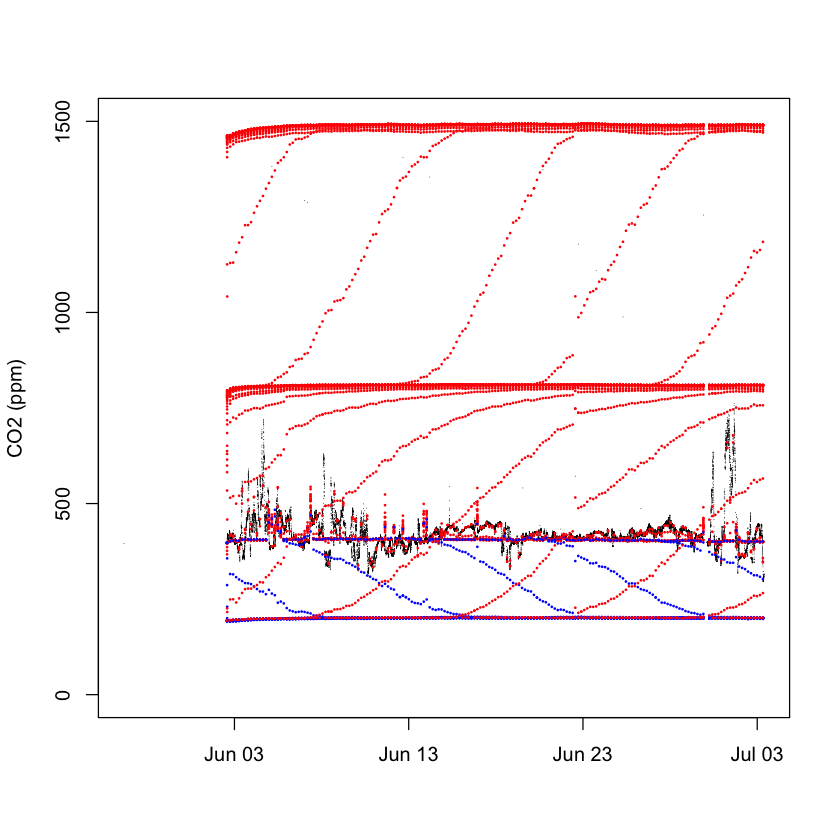

In [32]:
plot(data$v1$time, data$v1$co2_ppm, pch=16, cex=0.1, ylim=c(0, 1500), ylab='CO2 (ppm)', xlab='')

points(data$v2$time, data$v2$co2_ppm, pch=16, cex=0.3, col='red')
points(data$v3$time, data$v3$co2_ppm, pch=16, cex=0.3, col='blue')
points(data$v4$time, data$v4$co2_ppm, pch=16, cex=0.3, col='red')
points(data$v5$time, data$v5$co2_ppm, pch=16, cex=0.3, col='red')

In [33]:
save(data, file = 'RStates/pCO2.rdata')

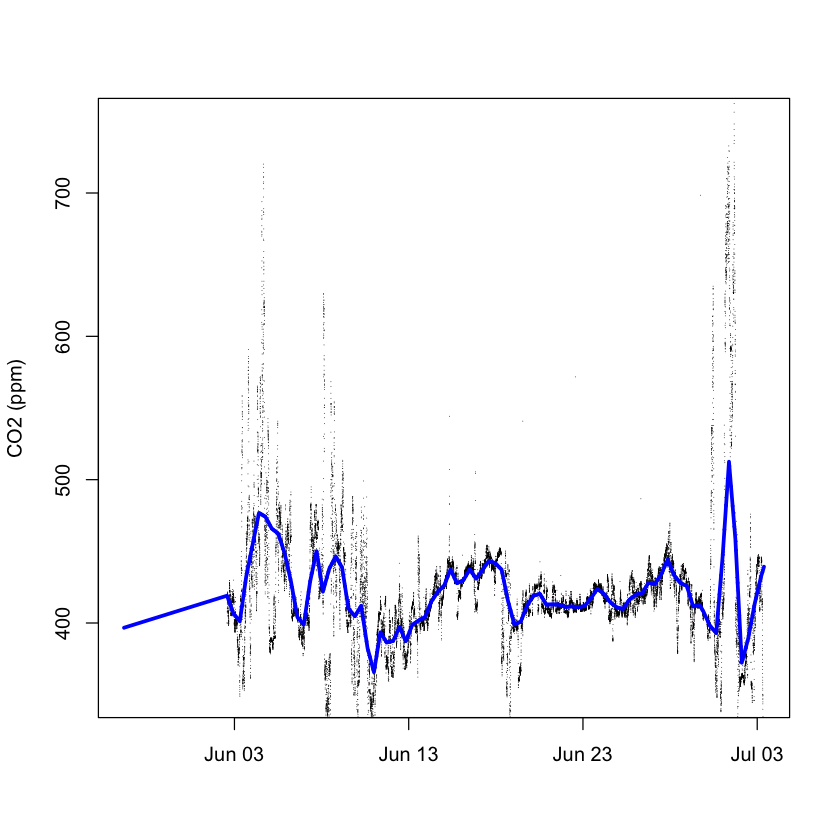

In [44]:
plot(data$v1$time, data$v1$co2_ppm, pch=16, cex=0.1, ylim=c(350, 750), ylab='CO2 (ppm)', xlab='')
lines(lowess(data$v1$time, data$v1$co2_ppm, f = 0.03), lwd=3, col='blue')